# Titanic Survival Prediction
All the data was taken from kaggle.com
https://www.kaggle.com/competitions/titanic/

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV


In [134]:
# Read the data
df_train = pd.read_csv('data\\train.csv')
df_test = pd.read_csv('data\\test.csv')

In [135]:
# Data exploration
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data cleaning

In [136]:

df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [137]:
print(df_train['Name'].head(100))

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
                            ...                        
95                          Shorney, Mr. Charles Joseph
96                            Goldschmidt, Mr. George B
97                      Greenfield, Mr. William Bertram
98                 Doling, Mrs. John T (Ada Julia Bone)
99                                    Kantor, Mr. Sinai
Name: Name, Length: 100, dtype: object


In [138]:
#change names to titles
df_train['Name'] = df_train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df_test['Name'] = df_test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [139]:
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [140]:
#df_train.drop('Name', axis=1, inplace=True)
#df_test.drop('Name', axis=1, inplace=True)


In [141]:
df_train.drop('Ticket', axis=1, inplace=True)
df_test.drop('Ticket', axis=1, inplace=True)

In [142]:
df_train.drop('PassengerId', axis=1, inplace=True)


In [143]:
#df_train.drop('Embarked', axis=1, inplace=True)
#df_test.drop('Embarked', axis=1, inplace=True)

In [144]:
#fill missing age values with mean
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

#fill missing fare values with mean
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

#fill missing embarked values with mode
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_test['Embarked'].fillna(df_test['Embarked'].mode()[0], inplace=True)

In [145]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,Mr,male,22.0,1,0,7.2500,S
1,1,1,Mrs,female,38.0,1,0,71.2833,C
2,1,3,Miss,female,26.0,0,0,7.9250,S
3,1,1,Mrs,female,35.0,1,0,53.1000,S
4,0,3,Mr,male,35.0,0,0,8.0500,S


In [146]:
#convert categorical values to numerical values
df_train["Sex"].replace(["male", "female"], [0, 1], inplace=True)
df_test["Sex"].replace(["male", "female"], [0, 1], inplace=True)

df_train["Name"].replace(df_train['Name'].unique(), np.arange(0, len(df_train['Name'].unique())), inplace=True)
df_test["Name"].replace(df_test['Name'].unique(), np.arange(0, len(df_test['Name'].unique())), inplace=True)

df_train["Embarked"].replace(df_train['Embarked'].unique(), np.arange(0, len(df_train['Embarked'].unique())), inplace=True)
df_test["Embarked"].replace(df_test['Embarked'].unique(), np.arange(0, len(df_test['Embarked'].unique())), inplace=True)

## Data visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


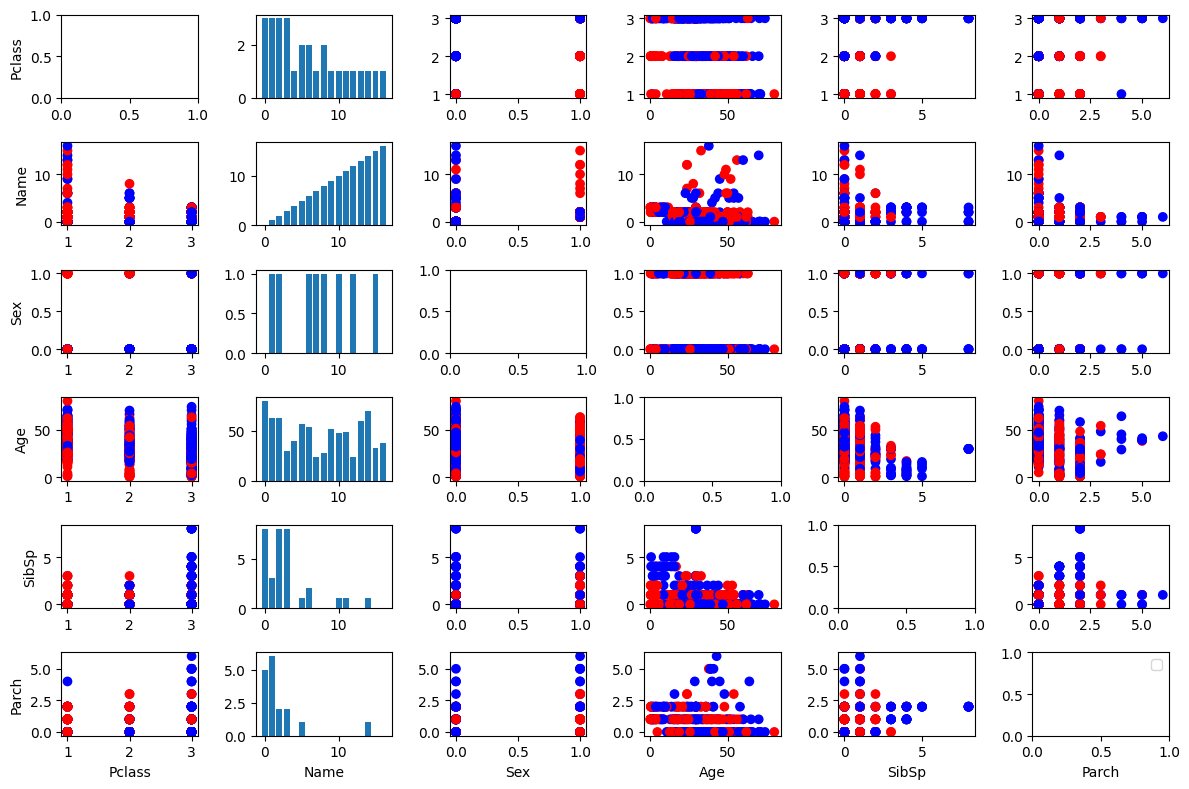

In [147]:
fig, ax = plt.subplots(6, 6,figsize=(12, 8))
for i in range(1, 7, 1):
    for j in range(1, 7, 1):
        if i != j and j != 2:
            ax[i-1, j-1].scatter(df_train.iloc[:, j], df_train.iloc[:, i], c=df_train['Survived'], cmap='bwr')
        elif j == 2:
            ax[i-1, j-1].bar(df_train.iloc[:, j],df_train.iloc[:, i])


        if i == 6:
            ax[i-1, j-1].set_xlabel(df_train.columns[j])
        if j == 1:
            ax[i-1, j-1].set_ylabel(df_train.columns[i])
plt.legend()
plt.tight_layout()

## Model selection

In [96]:
#X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'], test_size=0.2, random_state=0)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)


In [148]:
#no sclaing
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Survived', axis=1), df_train['Survived'], test_size=0.2, random_state=0)

In [149]:
#function to print the accuracy of all models of the grid search
def print_results(grid):
    print(grid.best_estimator_)
    print("Train score: ", grid.best_score_)
    print("Test score: ", grid.best_estimator_.score(X_test, y_test))


In [150]:
#train and test random forest classifier
params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}
rf = RandomForestClassifier(random_state=0)
clf = GridSearchCV(rf, params, cv=5)
clf.fit(X_train, y_train)
print_results(clf)

RandomForestClassifier(max_depth=6, n_estimators=10, random_state=0)
Train score:  0.8370333891460653
Test score:  0.8156424581005587


In [151]:
#train and test support vector classifier
from sklearn.svm import SVC
params = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001]}

clf = GridSearchCV(SVC(), params)
clf.fit(X_train, y_train)
print_results(clf)


SVC(C=100, gamma=0.001)
Train score:  0.8089825667290456
Test score:  0.776536312849162


In [152]:
from sklearn.tree import DecisionTreeClassifier
params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clf = GridSearchCV(DecisionTreeClassifier(), params)
clf.fit(X_train, y_train)

print_results(clf)

DecisionTreeClassifier(max_depth=5)
Train score:  0.8314685314685315
Test score:  0.7988826815642458


In [153]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]}

clf = GridSearchCV(KNeighborsClassifier(), params)

clf.fit(X_train, y_train)

print_results(clf)


KNeighborsClassifier(n_neighbors=1)
Train score:  0.7205062543090712
Test score:  0.6759776536312849


In [154]:
from sklearn.linear_model import LogisticRegression
params = {'C': [0.1, 1, 10, 100, 1000]}
clf = GridSearchCV(LogisticRegression(), params)

clf.fit(X_train, y_train)

print_results(clf)

c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

LogisticRegression(C=0.1)
Train score:  0.8146360681571949
Test score:  0.776536312849162


c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

In [155]:
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

clf = GridSearchCV(GradientBoostingClassifier(), params)

clf.fit(X_train, y_train)

print_results(clf)

GradientBoostingClassifier()
Train score:  0.8356446370530879
Test score:  0.8435754189944135


In [156]:
from sklearn.neural_network import MLPClassifier
params = {'hidden_layer_sizes': [(10,), (50,), (100,)], 'alpha': [0.0001, 0.001, 0.01, 0.1]}
clf = GridSearchCV(MLPClassifier(), params)
clf.fit(X_train, y_train)

print_results(clf)

c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

MLPClassifier(alpha=0.01)
Train score:  0.8160149709445484
Test score:  0.8100558659217877


c:\Users\Volplayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [157]:
import tensorflow as tf

In [158]:
#setup model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='tanh', input_shape=(8,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

#train model
model.fit(X_train, y_train, epochs=300, batch_size=32)

#test model
model.evaluate(X_test, y_test)

Epoch 1/300
23/23 [==============================] - 1s 2ms/step - loss: 0.7977 - accuracy: 0.4017
Epoch 2/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6529 - accuracy: 0.6770
Epoch 3/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6713
Epoch 4/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6171 - accuracy: 0.6784
Epoch 5/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6121 - accuracy: 0.6742
Epoch 6/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.6770
Epoch 7/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.6798
Epoch 8/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6055 - accuracy: 0.6798
Epoch 9/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6034 - accuracy: 0.6798
Epoch 10/300
23/23 [==============================] - 0s 2ms/step - loss: 0.6023 - accuracy: 0.6770
Epoch 11/

[0.5527257323265076, 0.7150837779045105]

In [159]:
final_model = GradientBoostingClassifier()

final_model.fit(X_train, y_train)



GradientBoostingClassifier()

In [160]:
#predict test data
final_model.predict(df_test.drop('PassengerId', axis=1))


array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [161]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,0,34.50000,0,0,7.8292,0
1,893,3,1,1,47.00000,1,0,7.0000,1
2,894,2,0,0,62.00000,0,0,9.6875,0
3,895,3,0,0,27.00000,0,0,8.6625,1
4,896,3,1,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0,30.27259,0,0,8.0500,1
414,1306,1,8,1,39.00000,0,0,108.9000,2
415,1307,3,0,0,38.50000,0,0,7.2500,1
416,1308,3,0,0,30.27259,0,0,8.0500,1


In [162]:
#write predictions to csv file
df_result = pd.DataFrame()
df_result["PassengerId"] = df_test["PassengerId"]
df_result["Survived"] = final_model.predict(df_test.drop('PassengerId', axis=1))
df_result[['PassengerId', 'Survived']].to_csv('data\\predictions.csv', index=False)

In [163]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [164]:
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
